### 농어(perch)의 길이 데이터를 통해 농어 무게 예측하는 모델 만들기

# 1. 데이터 준비

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달

from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)


# 2. 모델 학습 (Linear Regression)

##### 선형회귀
- 널리 사용되는 대표적인 회귀 알고리즘
- 하나의 독립변수 사용
- $y = Wx + b : (y = dependent variable, W = weight, x = independent variable, b = bias)$
- 직선의 그래프
- W = coef_ 변수에 저장
- b = intercept_ 변수에 저장

In [2]:
from sklearn.linear_model import LinearRegression
    # 선형 회귀 사용을 위해 sklearn 에서 LinearRegression 호출

lr = LinearRegression() # 객체 정의
lr.fit(train_data, train_target) # 훈련 세트로 모델 학습시키기
print(lr.predict([[100]])) # 길이가 100인 농어의 몸무게를 예측하기

[3192.69585141]


- **K-NN 회귀를 이용했을 때 길이가 아무리 커져도 무게는 늘어나지 않는 결과를 봤었다. K-NN 회귀를 이용했을 때보다 약 3배 이상 무거운 무게가 나왔다.**

In [3]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


$y = (lr.coef_)x + (lr.intercept_)$
$y = 39.01x - 709.01$

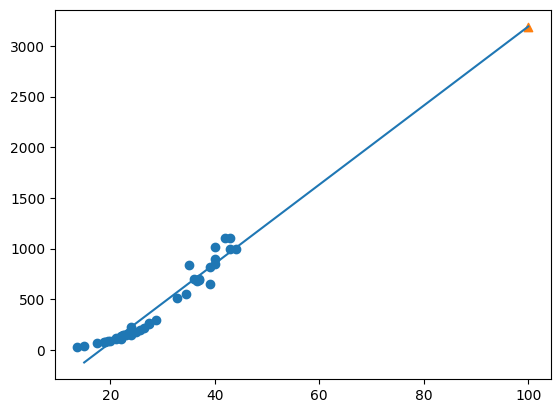

In [4]:
import matplotlib.pyplot as plt

plt.scatter(train_data, train_target)
plt.plot([15, 100], [15 * lr.coef_ + lr.intercept_, 100 * lr.coef_ + lr.intercept_])
    # 구한 직선의 방정식을 y = f(x)라고 한다면, 직선은 두 점 (15, f(15))와 (100, f(100))을 연결하는 직선일 것.
plt.scatter(100, 3192, marker = '^')
plt.show()

# 3. $R^2$ 확인

In [5]:
print(lr.score(train_data, train_target)) # 모델 학습이 잘 되었는지 훈련 세트와 테스트 세트를 전달해 정확도 점수를 산출.
print(lr.score(test_data, test_target))

0.939846333997604
0.8247503123313558


- **두 세트에 대한 훈련 모델의 $R^2$ 점수에 차이가 있을 뿐더러, 훈련 세트의 점수도 그렇게 높지 않다. 훈련 세트에 대한 overfitting이 있다. 그 이유는 실제 농어의 데이터는 직선보다는 곡선에 가깝기 때문이다.**